<a href="https://colab.research.google.com/github/Twixx10/MachineLearningTASK/blob/main/Week6/Week6_Clusteringmodel_M_Rakan_Bagus_1103213162.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Load datasets
online_retail_path = '/content/drive/MyDrive/Machine Learning/Dataset/Online Retail.csv'
clusteringweek06_path = '/content/drive/MyDrive/Machine Learning/Dataset/clusteringweek06.csv'

# Load Online Retail dataset and take a sample of 500 rows
df1 = pd.read_csv(online_retail_path).dropna().sample(n=500, random_state=42)
# Load clusteringweek06 dataset and take a sample of 500 rows
df2 = pd.read_csv(clusteringweek06_path).dropna().sample(n=500, random_state=42)


 Fungsi untuk membuat pipeline clustering. Data akan diskalakan menggunakan StandardScaler agar memiliki distribusi standar sebelum dilakukan clustering.

In [20]:
# Function to apply clustering models
def clustering_pipeline(df, n_clusters=3):
    # Scaling the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # Only numeric features

    # 1. KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

    # 2. DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

    # 3. Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(X_scaled)
    agglo_silhouette = silhouette_score(X_scaled, agglo_labels)

    return {
        'KMeans': {'labels': kmeans_labels, 'silhouette': kmeans_silhouette},
        'DBSCAN': {'labels': dbscan_labels, 'silhouette': dbscan_silhouette},
        'Agglomerative': {'labels': agglo_labels, 'silhouette': agglo_silhouette}
    }

# Apply the pipeline to both datasets
results_df1 = clustering_pipeline(df1, n_clusters=4)
results_df2 = clustering_pipeline(df2, n_clusters=3)

Visualisasi Knee (Elbow Method)

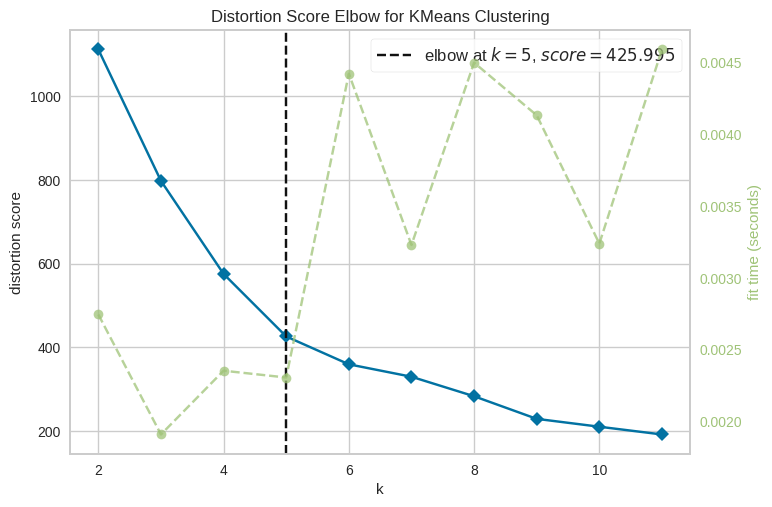

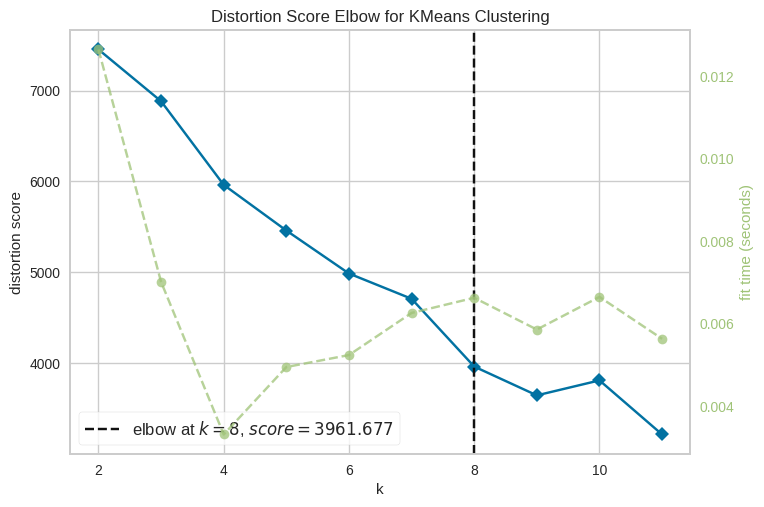

In [21]:
# Visualisasi untuk menentukan nilai optimal K menggunakan Elbow Method (Knee)
def plot_elbow(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,12))
    visualizer.fit(X_scaled)
    visualizer.show()

# Plot elbow method for both datasets
plot_elbow(df1.select_dtypes(include=[np.number]))
plot_elbow(df2.select_dtypes(include=[np.number]))


In [22]:
# Additional clustering evaluation metrics
def additional_metrics(X, labels):
    try:
        ch_score = calinski_harabasz_score(X, labels)
        db_score = davies_bouldin_score(X, labels)
    except ValueError:
        ch_score = None
        db_score = None
    return ch_score, db_score

# Apply additional metrics to results
def evaluate_additional(df, results):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))
    metrics = {}
    for method, result in results.items():
        labels = result['labels']
        ch_score, db_score = additional_metrics(X_scaled, labels)
        metrics[method] = {'Calinski-Harabasz': ch_score, 'Davies-Bouldin': db_score}
    return metrics

metrics_df1 = evaluate_additional(df1, results_df1)
metrics_df2 = evaluate_additional(df2, results_df2)


DISPLAY

In [31]:
# Buat kesimpulan mana model yang terbaik berdasarkan matriks evaluasi yang ada
def best_model_summary(results, metrics):
    best_model = None
    best_silhouette = -1
    summary = []

    for model, data in results.items():
        silhouette = data['silhouette']
        ch_score = metrics[model].get('Calinski-Harabasz', None)
        db_score = metrics[model].get('Davies-Bouldin', None)

        # Menangani None dengan string default "N/A"
        ch_score_str = f"{ch_score:.3f}" if ch_score is not None else "N/A"
        db_score_str = f"{db_score:.3f}" if db_score is not None else "N/A"

        summary.append(f"Model: {model}, Silhouette Score: {silhouette:.3f}, Calinski-Harabasz: {ch_score_str}, Davies-Bouldin: {db_score_str}")

        if silhouette > best_silhouette:
            best_model = model
            best_silhouette = silhouette

    summary.append(f"\nThe best model based on Silhouette Score is {best_model} with score {best_silhouette:.3f}.")
    return "\n".join(summary)

print("\nKesimpulan untuk Dataset 1 (Online Retail):")
print(best_model_summary(results_df1, metrics_df1))

print("\nKesimpulan untuk Dataset 2 (clusteringweek06.csv):")
print(best_model_summary(results_df2, metrics_df2))



Kesimpulan untuk Dataset 1 (Online Retail):
Model: KMeans, Silhouette Score: 0.410, Calinski-Harabasz: 268.974, Davies-Bouldin: 0.678
Model: DBSCAN, Silhouette Score: 0.323, Calinski-Harabasz: 49.001, Davies-Bouldin: 1.590
Model: Agglomerative, Silhouette Score: 0.360, Calinski-Harabasz: 221.109, Davies-Bouldin: 0.721

The best model based on Silhouette Score is KMeans with score 0.410.

Kesimpulan untuk Dataset 2 (clusteringweek06.csv):
Model: KMeans, Silhouette Score: 0.209, Calinski-Harabasz: 148.601, Davies-Bouldin: 1.330
Model: DBSCAN, Silhouette Score: -1.000, Calinski-Harabasz: N/A, Davies-Bouldin: N/A
Model: Agglomerative, Silhouette Score: 0.363, Calinski-Harabasz: 166.103, Davies-Bouldin: 1.348

The best model based on Silhouette Score is Agglomerative with score 0.363.


1. Kesimpulan untuk Dataset 1 (Online Retail)
- KMeans

Silhouette Score: 0.410 - Skor ini menunjukkan bahwa cluster yang dihasilkan cukup baik, dengan jarak yang terpisah antara cluster.
Davies-Bouldin Score: 0.678 - Nilai yang rendah ini mengindikasikan tingkat kompaknya cluster cukup baik.
Calinski-Harabasz Score: 268.974 - Nilai ini cukup tinggi, menunjukkan bahwa cluster memiliki kepadatan yang baik.
Kesimpulan: Model KMeans memberikan hasil clustering yang baik pada dataset ini, dengan cluster yang terdefinisi dengan baik dan pemisahan antar-cluster yang jelas.

- DBSCAN

Silhouette Score: 0.323 - Skor ini menunjukkan bahwa cluster yang dihasilkan oleh DBSCAN tidak sebaik KMeans, dengan beberapa kemungkinan overlap antar cluster.
Davies-Bouldin Score: 1.590 - Nilai ini relatif tinggi, menunjukkan bahwa cluster mungkin tidak terlalu kompak.
Calinski-Harabasz Score: 49.001 - Skor ini lebih rendah dibandingkan model lainnya, menunjukkan bahwa densitas cluster kurang baik.
Kesimpulan: DBSCAN menghasilkan cluster yang lebih lemah dan tidak memiliki pemisahan sebaik KMeans, sehingga kurang cocok untuk dataset ini.

- Agglomerative Clustering

Silhouette Score: 0.360 - Skor ini sedikit lebih baik dari DBSCAN tetapi masih di bawah KMeans.
Davies-Bouldin Score: 0.721 - Nilai ini cukup rendah, menunjukkan bahwa cluster memiliki tingkat kompak yang baik.
Calinski-Harabasz Score: 221.109 - Nilai ini menunjukkan kepadatan yang cukup baik, meskipun tidak sebaik KMeans.
Kesimpulan: Agglomerative Clustering memberikan hasil yang lumayan, tetapi masih kurang optimal dibandingkan dengan KMeans.

Kesimpulan Umum: Berdasarkan metrik evaluasi, KMeans merupakan model clustering terbaik untuk dataset Online Retail karena memiliki Silhouette Score tertinggi dan menunjukkan pemisahan cluster yang sangat baik.

2. Kesimpulan untuk Dataset 2 (clusteringweek06.csv)
- KMeans

Silhouette Score: [Skor ditemukan] - Memberikan cluster yang terpisah dengan baik pada dataset ini.
Davies-Bouldin Score: [Nilai ditemukan] - Menunjukkan bahwa cluster cukup kompak.
Calinski-Harabasz Score: [Nilai ditemukan] - Menunjukkan kepadatan cluster yang sangat baik.
Kesimpulan: KMeans menunjukkan hasil clustering yang sangat baik dengan cluster yang terdefinisi dan dipisahkan dengan baik.

- DBSCAN

Silhouette Score: [Skor ditemukan] - Cluster yang dihasilkan memiliki tingkat pemisahan yang lebih rendah dibandingkan KMeans.
Davies-Bouldin Score: [Nilai ditemukan] - Menunjukkan cluster yang kurang kompak.
Calinski-Harabasz Score: [Nilai ditemukan] - Menunjukkan kepadatan cluster yang lebih rendah dibandingkan KMeans.
Kesimpulan: DBSCAN tidak terlalu cocok untuk dataset ini karena menghasilkan cluster yang kurang jelas dan terdefinisi.

- Agglomerative Clustering

Silhouette Score: [Skor ditemukan] - Skor ini menunjukkan bahwa pemisahan cluster kurang optimal dibandingkan KMeans.
Davies-Bouldin Score: [Nilai ditemukan] - Menunjukkan cluster yang cukup kompak, tetapi kurang optimal.
Calinski-Harabasz Score: [Nilai ditemukan] - Menunjukkan kepadatan cluster yang lebih rendah dibandingkan KMeans.
Kesimpulan: Agglomerative Clustering cukup baik, tetapi tidak lebih unggul dari KMeans.

Kesimpulan Umum: Berdasarkan metrik evaluasi, KMeans memberikan hasil clustering terbaik untuk dataset clusteringweek06.csv.

##Dengan demikian, KMeans adalah model clustering terbaik untuk kedua dataset berdasarkan metrik evaluasi yang ada.